# EDA ON DATASET

In [2]:
!pip install gdown


In [3]:
import gdown
file_id = '1eTtRs5cUlBP5dXsx-FTAlmXuB6JQi2qj'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

gdown.download(url, output='file.zip', quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1eTtRs5cUlBP5dXsx-FTAlmXuB6JQi2qj
To: /content/file.zip
100%|██████████| 24.9M/24.9M [00:01<00:00, 24.1MB/s]


'file.zip'

In [4]:
import zipfile
zip_file_path = 'file.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

import os
os.listdir('extracted_folder')


['PUBHEALTH']

In [5]:
!mv /content/extracted_folder/PUBHEALTH /content/pubhealth
!rm -rf /content/extracted_folder
!rm -rf /content/file.zip


## Data Extraction

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

test_df = pd.read_csv('/content/pubhealth/test.tsv', sep='\t')
train_df = pd.read_csv('/content/pubhealth/train.tsv', sep='\t')

### Training Set

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   claim_id        9832 non-null   object
 1   claim           9824 non-null   object
 2   date_published  7895 non-null   object
 3   explanation     9824 non-null   object
 4   fact_checkers   9821 non-null   object
 5   main_text       9806 non-null   object
 6   sources         9804 non-null   object
 7   label           9805 non-null   object
 8   subjects        9804 non-null   object
dtypes: object(9)
memory usage: 691.4+ KB


In [9]:
train_df.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,


### Test Set

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1235 non-null   int64 
 1   claim_id        1235 non-null   int64 
 2   claim           1235 non-null   object
 3   date_published  1009 non-null   object
 4   explanation     1235 non-null   object
 5   fact_checkers   1235 non-null   object
 6   main_text       1235 non-null   object
 7   sources         1235 non-null   object
 8   label           1233 non-null   object
 9   subjects        1233 non-null   object
dtypes: int64(2), object(8)
memory usage: 96.6+ KB


## EDA

### Frequency of labels

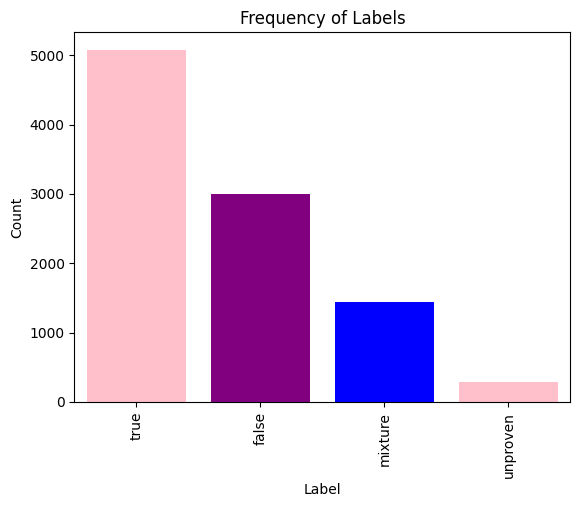

In [11]:
#frequency of labels

label_count = train_df['label'].value_counts()
label_count = label_count.drop('snopes')
label_count.plot(kind='bar', title='Frequency of Labels')
plt.bar(label_count.index, label_count.values, color=['pink', 'purple', 'blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()



### Years of publishing

<ipython-input-12-0c4b9af139bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['year_published'] = pd.to_datetime(train_copy['date_published'], format='%B %d, %Y', errors='coerce').dt.year


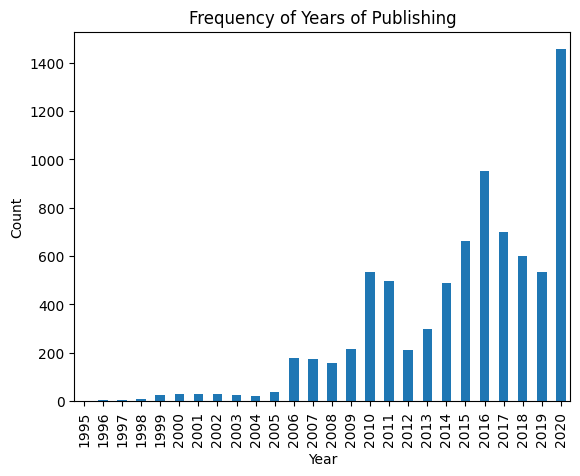

In [12]:
#year of publishing a particular claim

train_copy = train_df.copy()
train_copy = train_copy.dropna(subset=['date_published'])
train_copy['year_published'] = pd.to_datetime(train_copy['date_published'], format='%B %d, %Y', errors='coerce').dt.year
train_copy = train_copy.dropna(subset=['year_published'])
train_copy['year_published'] = train_copy['year_published'].astype(int)
year_count = train_copy['year_published'].value_counts().sort_index()
year_count.plot(kind='bar', title='Frequency of Years of Publishing')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Common words in claim

In [13]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


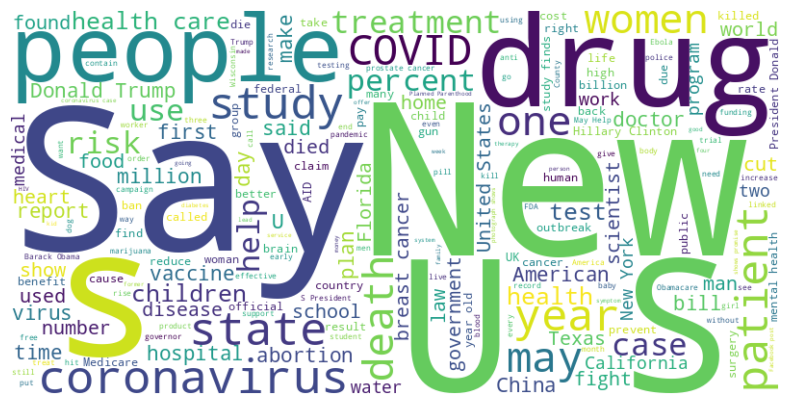

In [14]:
#common phrases in claim
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
claim_text = ' '.join(
    [word for word in train_df['claim'].dropna().apply(str).str.split().sum() if word.lower() not in stop_words]
)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(claim_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Common words in Subject

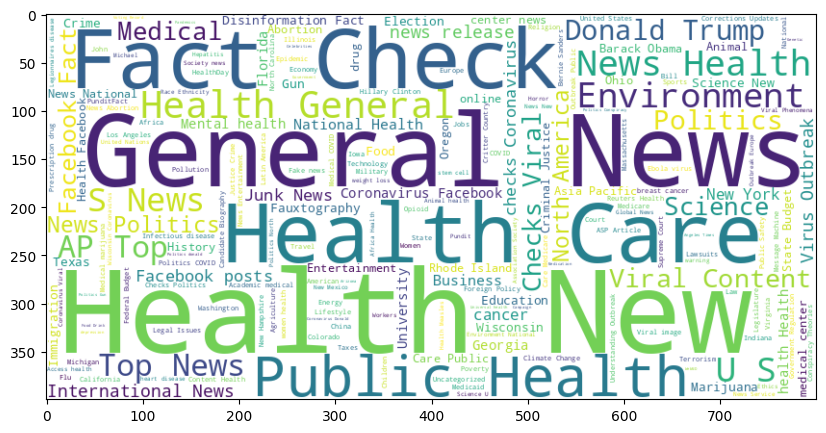

In [15]:
subject_text = ' '.join(
    [word for word in train_df['subjects'].dropna().apply(str).str.split().sum() if word.lower() not in stop_words]
)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subject_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

### Words in claim pre-pandemic

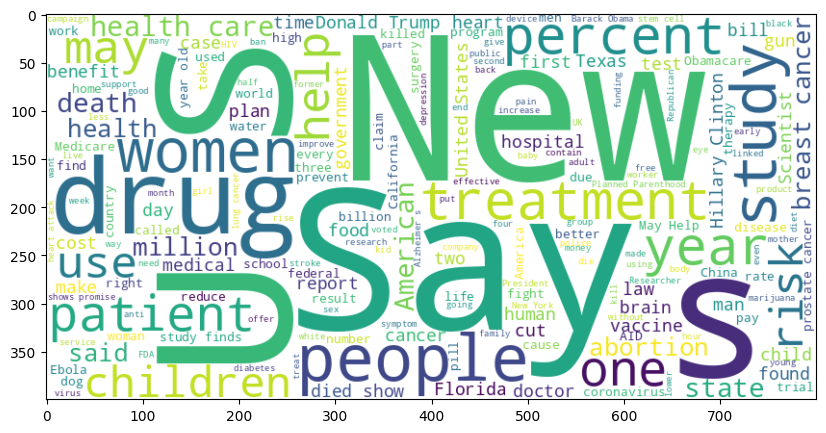

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = train_df.copy()
df['date_published'] = pd.to_datetime(df['date_published'], errors='coerce')
covid_start_date = datetime(2020, 3, 11)

claim_text_pre_covid = ' '.join(
    [word for word in df[df['date_published'] < covid_start_date]['claim'].dropna().apply(str).str.split().sum() if word.lower() not in stop_words]
)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(claim_text_pre_covid)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')



### Words in claim Post-pandemic

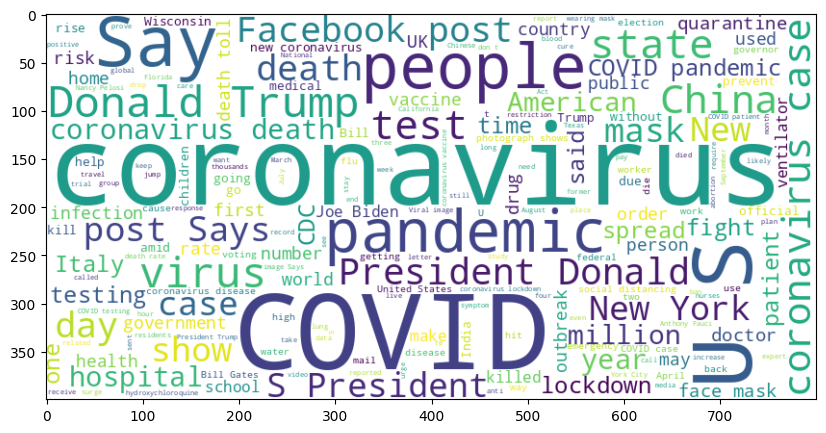

In [17]:
#claims during the pandemic

claim_text_post_covid = ' '.join(
    [word for word in df[df['date_published'] >= covid_start_date]['claim'].dropna().apply(str).str.split().sum() if word.lower() not in stop_words]
)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(claim_text_post_covid)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

